# Tutorial 3 (Week 4) - Data Preprocessing

## Learning Objectives

After completing this tutorial, you should be able to:

+ Perform data transformation using `sklearn.preprocessing`
  + Perform standardization and normalization
  + Encode ordinal and nominal values as numerical values
  + Perform discretization
  + Generate polynomial features
+ Combine preprocessing steps for heterogenous data
+ Handle missing values using `sklearn.impute`
+ Perform dimensionality reduction using PCA

References:
- [scikit-tutorials](https://scikit-learn.org/stable/auto_examples/index.html#preprocessing)
- [Preprocessing tutorial](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
- [Column transformers tutorial](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)
- [Pipelines tutorial](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).


We have learned data visualization in a previous tutorial. In practise, data cleaning and visualization go hand in hand, and are usually done together too. We will go over a few data cleaning strategies in this tutorial.

In [1]:
import pandas as pd
import numpy as np

# Dataset

Let us work on the heart disease dataset ["Statlog (Heart)"](https://archive.ics.uci.edu/dataset/145/statlog+heart). The csv file and txt files with the dataset info are available from this Tutorial folder.

This dataset has 13 attributes and 1 label column (presence or absence of heart disease). In this tutorial, we are working on only data preprocessing, and not concerning ourselves with any model and its prediction. Thus for simplicity, we will work on the whole dataset without splitting it into training and testing datasets. 

Go ahead and read the dataset using Pandas as usual, loading it into a variable `data`.

In [2]:
# TODO
data = pd.read_csv("heart-statlog-T3.csv")
data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


The `class` column indicates the presence and absence of disease, which we are not using for preprocessing in this tutorial. 

Use the `DataFrame.drop` function to drop the `class` column from the data.

In [3]:
# TODO
data = data.drop(columns=['class'])

Let's rename some of the columns for easier handling.

```
resting_blood_pressure               --> rest_BP
serum_cholestoral                    --> cholesterol
fasting_blood_sugar                  --> fast_sugar
resting_electrocardiographic_results --> rest_ECG
maximum_heart_rate_achieved          --> max_HR
exercise_induced_angina              --> exer_angina
number_of_major_vessels              --> vessels
```

In [4]:
# TODO
data = data.rename(columns={'resting_blood_pressure' : 'rest_BP'
                    ,'serum_cholestoral' : 'cholesterol'
                    ,'fasting_blood_sugar' : 'fast_sugar'
                    ,'resting_electrocardiographic_results' : 'rest_ECG'
                    ,'maximum_heart_rate_achieved' : 'max_HR'
                    ,'exercise_induced_angina' : 'exer_angina'
                    ,'number_of_major_vessels' : 'vessels'})

The data has no missing values - this is stated in the accompanying txt file. Let's have a quick check on its descriptive statistics.

In [6]:
# TODO
data.describe()

,age,sex,chest,rest_BP,cholesterol,fast_sugar,rest_ECG,max_HR,exer_angina,oldpeak,slope,vessels,thal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


The `heart-statlog.txt` file lists the data type of each attribute in the dataset: numerical (real), ordinal, binary, or categorical (nominal).

We will perform different preprocessing operations:
- Discretization on the `age` data
- Normalization and Polynomial Feature Construction on the other numerical data
- Encoding the ordinal and nominal data

Let's save the column indices for each of these types in a list for our later use. Complete the code below using the information from `heart-statlog.txt`. _(Note that the numbering in the txt file starts from 1, while column indexing starts from 0 -- adjust accordingly.)_

In [7]:
# Discrete (the age column)
disc_features = [0]

# Numerical (the rest of the real columns)
num_features = [3,4,7,9,11]

# TODO

# Ordinal
# ordinal_features = ?
ordinal_features = [10]

# Binary
# bin_features = ?
bin_features = [1,5,8]
# Categorical (nominal)
# cat_features = ?
cat_features = [6,2,12]

# Introduction to scikit-learn

The [`scikit-learn`](https://scikit-learn.org/stable/index.html) library is a part of the SciPy (Scientific Python) group, which has a set of libraries created for scientific computing. The first part of the name refers to this origin of the library, while the second part refers to the discipline this library pertains to: Machine Learning. It is built on NumPy, and has extremely efficient and reusable codes. The library is included in the Anaconda distribution.

## Transformers and Estimators

__Transformers__ is a term used for classes in `scikit-learn` (or `sklearn`) that enable data transformations. `scikit-learn` provides a library of transformers, which may _clean_ (for preprocessing), _reduce_ (for unsupervised dimensionality reduction), _expand_ (for kernel approximation) or _generate_ (for feature extraction) feature representations.

All standard transformers in `sklearn` have the following methods:

- `fit`, which learns model parameters (e.g., mean and standard deviation for normalization) from a training set;
- `transform`, which applies this transformation model to unseen data;
- `fit_transform`, which models and transforms the training data simultaneously for convenience and efficiency.

We will use transformers for scaling (standardization and normalisation) as well as for encoding in this tutorial.


__Estimators__ is a term used for classes which manage the estimation and decoding of a model. Estimators must provide a `fit` method, and should provide `set_params` and `get_params`, although these are usually provided by inheritance from `base.BaseEstimator`. 

We will use an estimator for discretization in this tutorial. 

A useful estimator class, but which we are not using in this tutorial, is _Predictors_. It is an estimator supporting `predict` and/or `fit_predict`. This encompasses classifier, regressor, outlier detector and clusterer.


## Preprocessing Module

A package in `scikit-learn`, named [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for tasks such as classification, regression, etc.

In [8]:
from sklearn import preprocessing

# Standardization and Normalization

_Standardization_ involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. If a feature has a variance that is orders of magnitude larger than others, it might end up dominating the estimator, which might not learn well from other features. 

_Normalization_ is the process of scaling individual samples to have unit norm, independently of the distribution of the samples. 

Note that standardization is a _feature-wise_ operation, while normalization is a _sample-wise_ operation. 

## Standardization

Let's perform standardization on the numerical columns. We can select these columns by passing the indices list we constructed earlier to `DataFrame.iloc`.

In [9]:
data.iloc[:,num_features]

,rest_BP,cholesterol,max_HR,oldpeak,vessels
0,130,322,109,2.4,3
1,115,564,160,1.6,0
2,124,261,141,0.3,0
3,128,263,105,0.2,1
4,120,269,121,0.2,1
...,...,...,...,...,...
265,172,199,162,0.5,0
266,120,263,173,0.0,0
267,140,294,153,1.3,0
268,140,192,148,0.4,0


The `preprocessing` module provides the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) utility class, which is a quick and easy way to perform standardization on an array-like dataset. The scaled data will have zero mean and a unit variance.

The `fit_transform` method of `StandardScaler` works on each feature to first calculate the mean and variance of the feature (_fit_), then transforms the feature using the calculated mean and variance values as scaling parameters (_transform_). The method returns the transformed data as an array.

Let's run this method on the numerical columns.

In [10]:
scaler = preprocessing.StandardScaler()

In [11]:
num_scaled = scaler.fit_transform( data.iloc[:,num_features] )
num_scaled

array([[-0.07540984,  1.40221232, -1.75920811,  1.18101235,  2.47268219],
       [-0.91675934,  6.0930045 ,  0.44640927,  0.48115318, -0.71153494],
       [-0.41194964,  0.21982255, -0.37529132, -0.65611797, -0.71153494],
       ...,
       [ 0.48548982,  0.85947603,  0.14367747,  0.21870599, -0.71153494],
       [ 0.48548982, -1.11763472, -0.07255953, -0.56863558, -0.71153494],
       [ 1.60728915,  0.70440852, -1.80245551,  0.39367078,  2.47268219]])

Verify that the standardization works: what are the mean values of the original columns, and what are the mean values of the transformed columns? Are the latter exactly zero?

_(Note: For the multidimensional array, you will need to specify the axis in order to apply mean computation on individual columns.)_

In [14]:
# TODO: Original means
data.iloc[:,num_features].mean()
# 或者
data.mean(axis=0)

age             54.433333
sex              0.677778
chest            3.174074
rest_BP        131.344444
cholesterol    249.659259
fast_sugar       0.148148
rest_ECG         1.022222
max_HR         149.677778
exer_angina      0.329630
oldpeak          1.050000
slope            1.585185
vessels          0.670370
thal             4.696296
dtype: float64

In [15]:
# TODO: Transformed mean
num_scaled = pd.DataFrame(num_scaled)
num_scaled.mean()

0    5.723816e-16
1   -2.343804e-16
2   -1.266477e-16
3    4.111937e-17
4   -7.894919e-17
dtype: float64

How about the variance?

In [20]:
# TODO: Original variance
data.iloc[:,num_features].var(axis=0)

rest_BP         319.037051
cholesterol    2671.467107
max_HR          536.650434
oldpeak           1.311506
vessels           0.890940
dtype: float64

In [21]:
# TODO: Transformed variance
num_scaled.var(axis=0)

0    1.003717
1    1.003717
2    1.003717
3    1.003717
4    1.003717
dtype: float64

## Normalisation

The `preprocessing` module has the [`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer) utility class, which transforms individual samples to unit norm. We can specify which norm to use (i.e., how the unit norm is defined); the default is the `l2` norm (Euclidean).

The `Normalizer` class also provides a `fit_transform` method. Run this method on our numerical columns.

In [25]:
# TODO
preprocessing.Normalizer().fit_transform(data.iloc[:,num_features])

array([[3.57164747e-01, 8.84669603e-01, 2.99468903e-01, 6.59381071e-03,
        8.24226338e-03],
       [1.92490913e-01, 9.44042391e-01, 2.67813444e-01, 2.67813444e-03,
        0.00000000e+00],
       [3.85662519e-01, 8.11757398e-01, 4.38535606e-01, 9.33054481e-04,
        0.00000000e+00],
       ...,
       [3.89119111e-01, 8.17150133e-01, 4.25251600e-01, 3.61324889e-03,
        0.00000000e+00],
       [5.00101562e-01, 6.85853570e-01, 5.28678794e-01, 1.42886160e-03,
        0.00000000e+00],
       [4.63678038e-01, 8.28824493e-01, 3.12982676e-01, 4.34698161e-03,
        8.69396321e-03]])

Another way to perform normalisation is to use the [`normalize`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize) method from the `preprocessing` module directly. Refer to the [Guide](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) and try it below.

In [26]:
# TODO
preprocessing.normalize(data.iloc[:,num_features], norm='l2')

array([[3.57164747e-01, 8.84669603e-01, 2.99468903e-01, 6.59381071e-03,
        8.24226338e-03],
       [1.92490913e-01, 9.44042391e-01, 2.67813444e-01, 2.67813444e-03,
        0.00000000e+00],
       [3.85662519e-01, 8.11757398e-01, 4.38535606e-01, 9.33054481e-04,
        0.00000000e+00],
       ...,
       [3.89119111e-01, 8.17150133e-01, 4.25251600e-01, 3.61324889e-03,
        0.00000000e+00],
       [5.00101562e-01, 6.85853570e-01, 5.28678794e-01, 1.42886160e-03,
        0.00000000e+00],
       [4.63678038e-01, 8.28824493e-01, 3.12982676e-01, 4.34698161e-03,
        8.69396321e-03]])

# Encoding Ordinal and Nominal Values

Ordinal data can be encoded into numerical data using [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This results in a single column of integers (0 to `n_categories - 1`) per feature. 

For our ordinal data, we do not actually need to use ordinal encoder, as the data is already in integer form. We will just instantiate this class here for a later use.

In [27]:
ord_enc = preprocessing.OrdinalEncoder( categories='auto' )

## One-Hot Encoding

A common technique for encoding categorical variables is [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). It transforms a categorical feature that has `n` possible values into `n` binary features. Exactly one of the binary features will have value 1 (corresponding to the feature value), and all others 0. 

For example, for a feature that has 4 categories named [1,2,3,4], the one-hot encoding will be:
```
1 -> [1, 0, 0, 0]

2 -> [0, 1, 0, 0]

3 -> [0, 0, 1, 0]

4 -> [0, 0, 0, 1]
```

What will happen if the encoder encounters unknown categories during transform? When `handle_unknown='ignore'` is specified, no error will be raised but the resulting one-hot encoded columns for this feature will be all zeros.

In [28]:
oh_enc = preprocessing.OneHotEncoder( categories='auto', handle_unknown='ignore' )

Let's apply one-hot encoding on our categorical (nominal) data. Select the relevant columns from the data. 

In [30]:
# TODO
data.iloc[:,cat_features]

,rest_ECG,chest,thal
0,2,4,3
1,2,3,7
2,0,2,7
3,0,4,7
4,2,2,3
...,...,...,...
265,0,3,7
266,0,2,7
267,2,2,3
268,0,4,6


Apply the `fit_transform` method of `OneHotEncoder` on those columns. How many columns do you expect to see in the output? (How many possible values does each feature have?)

In [31]:
# TODO
oh_enc.fit_transform(data.iloc[:,cat_features])


<270x10 sparse matrix of type '<class 'numpy.float64'>'
	with 810 stored elements in Compressed Sparse Row format>

Let's convert that sparse matrix output to NumPy multidimensional array so that we can view it, and save it as `data_cat` for further use.

In [32]:
# TODO
data_cat = oh_enc.fit_transform(data.iloc[:,cat_features]).toarray()
data_cat

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

As there are three transformed features, we will expect to see three 1 values in each row of the transformed data if there are no unknown categories.

In [33]:
data_cat[0]

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])

We have earlier instantiated OneHotEncoder with `categories=auto`, so that it determines categories automatically from the data. We can check the `categories_` properties to see them. 

In [34]:
# TODO
oh_enc.categories_

[array([0, 1, 2], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([3, 6, 7], dtype=int64)]

# Discretization

Discretization (otherwise known as _quantization_ or _binning_) provides a way to partition continuous features into discrete values. One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. 

In our example, we can perform discretization on the `age` column. Let's check its value range again. 

In [35]:
data['age'].describe()

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

As the range of the column is 29 to 77, we can do a binning into 5 bins to express different age-groups. 

We will use the estimater class [`KBinsDiscretizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer) for this. Let's instantiate it with 5 bins and onehot encoding, specify a strategy that will give us equal-sized bins, and a subsample option that will use all the samples for computing the quantiles that determine the binning thresholds.

In [36]:
# TODO
# discretizer = ?
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform')


# n_bins=5 specifies that you want to create 5 bins.
# encode='onehot' indicates that you want to use one-hot encoding after discretization.
# strategy='uniform' ensures that you get equal-sized bins.
# quantile_range=(0, 100): This parameter ensures that the entire dataset is used to compute quantiles for binning thresholds.

# subsample=1:This specifies that all samples are used for computing quantiles.

## 上面的代码，sub_sample和quantile_range不是参数!

As `KBinDiscretizer` works with an array, we first need to convert the `age` column to a NumPy array of dimension `num_values` x 1, where the single column corresponds to the single feature. (You can use `reshape` to control the dimension.)

In [37]:
# TODO
# age_arr = ?
age_arr =np.array(data['age']).reshape(270,1)
age_arr.shape

(270, 1)

Now use the discretizer's `fit` method to fit the data into bins. We can view the result by checking the `bin_edges_` property of the output.

In [38]:
# TODO
dis = discretizer.fit(age_arr)
discretizer.bin_edges_

array([array([29. , 38.6, 48.2, 57.8, 67.4, 77. ])], dtype=object)

Now we can use the discretizer's `transform` method to discretize the data.

In [39]:
# TODO
dis_newdata = discretizer.transform(age_arr)

The output is a sparse matrix, which we can convert to NumPy multidimensional array for viewing. We will expect to see one-hot encoding format as we specified earlier.

In [40]:
# TODO
dis_newdata.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Polynomial Feature Construction

It is often useful to add complexity to the model by considering nonlinear features of the input data. The transformer class [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) allows us to generate higher order terms and interaction terms (representing joint effects of multiple features) to consider this non-linearity. 

Refer to the class documentation for the definitions and default values of the parameters. Let's instantiate this class with degree 2, exclude bias columns, and only produce interaction features.

In [41]:
# TODO
# poly_tfr = ?
poly_tfr = preprocessing.PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)

Apply its `fit_transform` method to our numerical data columns. How many columns are there in the transformed data?

In [43]:
# TODO
# poly_feats = ?
print(data.iloc[:,num_features])
poly_feats = poly_tfr.fit_transform(data.iloc[:,num_features])
print(data.iloc[:,num_features].shape)
print(poly_feats.shape)

     rest_BP  cholesterol  max_HR  oldpeak  vessels
0        130          322     109      2.4        3
1        115          564     160      1.6        0
2        124          261     141      0.3        0
3        128          263     105      0.2        1
4        120          269     121      0.2        1
..       ...          ...     ...      ...      ...
265      172          199     162      0.5        0
266      120          263     173      0.0        0
267      140          294     153      1.3        0
268      140          192     148      0.4        0
269      160          286     108      1.5        3

[270 rows x 5 columns]
(270, 5)
(270, 15)


We can view the names of the constructed features using the `get_feature_names_out` method of `PolynomialFeatures`.

In [45]:
# TODO
poly_tfr.get_feature_names_out()

array(['rest_BP', 'cholesterol', 'max_HR', 'oldpeak', 'vessels',
       'rest_BP cholesterol', 'rest_BP max_HR', 'rest_BP oldpeak',
       'rest_BP vessels', 'cholesterol max_HR', 'cholesterol oldpeak',
       'cholesterol vessels', 'max_HR oldpeak', 'max_HR vessels',
       'oldpeak vessels'], dtype=object)

Those form the columns of the transformed data, comprising original and constructed features. Let's see the values on the first row before and after feature construction.

In [46]:
# TODO: Original feature values in first row
data.iloc[0,num_features]

rest_BP        130.0
cholesterol    322.0
max_HR         109.0
oldpeak          2.4
vessels          3.0
Name: 0, dtype: float64

In [47]:
# TODO: Transformed feature values in first row
poly_feats[0]

array([1.3000e+02, 3.2200e+02, 1.0900e+02, 2.4000e+00, 3.0000e+00,
       4.1860e+04, 1.4170e+04, 3.1200e+02, 3.9000e+02, 3.5098e+04,
       7.7280e+02, 9.6600e+02, 2.6160e+02, 3.2700e+02, 7.2000e+00])

# Putting It Together: Pipeline and ColumnTransformer

Our dataset contains heterogeneous data types. As we have done various different preprocessing on different columns - how do we put it all together? A simple approach could be to stitch it all together in a new DataFrame. The following code snippet could do categorical encoding and binning. 
```
new_data = pd.DataFrame()

for i in range(6):
    new_data['age_'+str(i)] = data_disc[:,i]
new_data['sex'] = data.sex
for i in range(4):
    new_data['chest_pain_'+str(i)] = data_cat[:,i]
new_data['restBP'] = data.restBP
new_data['cholesterol'] = data.cholesterol
new_data['fast_sugar'] = data.fast_sugar
for i in range(3):
    new_data['rest_ECG_'+str(i)] = data_cat[:,4+i]
new_data['max_HR'] = data.max_HR
new_data['exer_angina'] = data.exer_angina
new_data['oldpeak'] = data.oldpeak
new_data['slope'] = data.slope
new_data['vessels'] = data.vessels
for i in range(3):
    new_data['thal_'+str(i)] = data_cat[:,7+i]
    
new_data.head()
```

However, as the number of preprocessing steps increase and change, this approach becomes difficult to scale. To rescue us from this difficulty, sklearn has the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) and [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) packages. 

In [48]:
from sklearn import pipeline
from sklearn import compose

[__`pipeline.Pipeline`__](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) can be used to chain multiple _fixed_ steps into one. 

For example, our preprocessing steps for numeric columns are fixed: scaling, and doing polynomial feature creation. So we can essentially encapsulate these into a pipeline.

Let's instantiate `Pipeline` to chain our `StandardScaler` and `PolynomialFeatures` transformers from earlier.

In [51]:
# TODO
# numeric_transformer = ?
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler()), 
                                               ('poly_fea', preprocessing.PolynomialFeatures(degree=2,include_bias=False,interaction_only=True))])

We can blindly apply this numeric transformer (with `fit_transform`) to all our columns of data. Starting with 13 columns, how many columns will the fitted product have?

In [52]:
# TODO
numeric_transformer.fit_transform(data).shape
# have 105 columns

(270, 91)

However, this is not very useful -- what is the meaning of a polynomial variable comprising a nominal variable multiplied by a real variable?

[__`compose.ColumnTransformer`__](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) helps to perform different transformations for different columns of the data, within a Pipeline that is safe from data leakage and that can be parameterized. To each column, a different transformation can be applied, such as preprocessing for different types of data.

Let's instantiate `ColumnTransformer` to combine the following transformers that we have seen earlier:
- apply the numeric transformation `Pipeline` to our numeric features;
- apply the discretizer to our discrete feature;
- apply the one-hot encoder to our categorical features;
- apply the ordinal encoder to our ordinal features.

We can specify that we want all remaining columns that were not specified in transformers, but present in the data passed to fit, to be automatically passed through.

In [53]:
# TODO
# preprocessor = ?

numeric_transformer = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),          # Step 1: StandardScaler
    ('poly_fea', preprocessing.PolynomialFeatures())    # Step 2: PolynomialFeatures
])

preprocessor = compose.ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),  # Apply numeric_transformer to numeric_features
        ('discrete', preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal'), disc_features),  # Apply discretizer to discrete_features
        ('oh_enc', preprocessing.OneHotEncoder(), cat_features),  # Apply one-hot encoder to categorical_features
        ('ord_enc', preprocessing.OrdinalEncoder(), ordinal_features)  # Apply ordinal encoder to ordinal_features
    ])




Now run its `fit_transform` and check the result.

In [55]:
# TODO
compose = preprocessor.fit_transform(data)
print(compose.shape)
compose

(270, 33)


array([[ 1.        , -0.07540984,  1.40221232, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.91675934,  6.0930045 , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -0.41194964,  0.21982255, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.        ,  0.48548982,  0.85947603, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.48548982, -1.11763472, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.60728915,  0.70440852, ...,  0.        ,
         0.        ,  1.        ]])

Finally, we can convert the preprocessed data back to DataFrame format for our use in analysis.

In [60]:
# TODO
pd.DataFrame(compose)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,-0.075410,1.402212,-1.759208,1.181012,2.472682,0.005687,-0.105741,0.132662,-0.089060,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,-0.916759,6.093004,0.446409,0.481153,-0.711535,0.840448,-5.585819,-0.409250,-0.441102,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,-0.411950,0.219823,-0.375291,-0.656118,-0.711535,0.169703,-0.090556,0.154601,0.270288,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,-0.187590,0.258589,-1.932198,-0.743600,0.349871,0.035190,-0.048509,0.362461,0.139492,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,-0.636310,0.374890,-1.240239,-0.743600,0.349871,0.404890,-0.238546,0.789176,0.473160,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,2.280369,-0.981951,0.532904,-0.481153,-0.711535,5.200082,-2.239210,1.215218,-1.097207,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
266,1.0,-0.636310,0.258589,1.008625,-0.918565,-0.711535,0.404890,-0.164543,-0.641798,0.584492,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
267,1.0,0.485490,0.859476,0.143677,0.218706,-0.711535,0.235700,0.417267,0.069754,0.106180,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
268,1.0,0.485490,-1.117635,-0.072560,-0.568636,-0.711535,0.235700,-0.542600,-0.035227,-0.276067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Dealing with Missing Values using `SimpleImputer`

Since our dataset has no missing values, let us randomly remove some `age` values for the purpose of this tutorial.

In [56]:
data_drop = data.copy()
data_drop.iloc[ np.random.randint(0, 268, size = 10).tolist(), 0 ] = np.nan
data_drop.age.to_numpy()

array([70., 67., 57., 64., 74., 65., 56., nan, 60., 63., 59., 53., 44.,
       61., 57., 71., 46., 53., 64., 40., 67., 48., 43., 47., 54., 48.,
       46., 51., 58., 71., 57., 66., nan, 59., 50., 48., 61., 59., 42.,
       48., 40., 62., 44., 46., 59., 58., 49., 44., 66., 65., 42., 52.,
       65., 63., 45., 41., 61., 60., 59., 62., 57., 51., 44., 60., 63.,
       nan, 51., 58., 44., 47., 61., 57., 70., 76., 67., 45., 45., 39.,
       42., 56., 58., 35., 58., 41., 57., nan, 62., 59., 41., 50., 59.,
       61., 54., 54., 52., 47., 66., 58., 64., 50., 44., 67., 49., 57.,
       63., 48., 51., 60., nan, 45., 55., 41., 60., 54., 42., 49., 46.,
       56., 66., 56., 49., 54., 57., 65., nan, 54., 62., 52., 52., 60.,
       63., 66., 42., 64., 54., 46., nan, 56., 34., 57., 64., 59., 50.,
       51., 54., 53., 52., 40., 58., 41., 41., 50., 54., 64., 51., 46.,
       55., 45., 56., 66., nan, 62., 55., 58., 43., 64., 50., 53., 45.,
       65., 69., 69., 67., 68., 34., 62., 51., 46., 67., 50., 42

`sklearn.impute` package provides a [__`SimpleImputer`__](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) that can help us fill these missing values.

In [57]:
from sklearn.impute import SimpleImputer

Let's instantiate the class to replace missing values with the mean of the column.

In [58]:
# TODO
# imp_mean = ?
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

We can run the `fit` method first and see the computed values, in particular the mean `age` which will be used to replace the values we removed.

In [59]:
# TODO
imp_mean.fit(data_drop)

SimpleImputer()

Now we can run the `transform` method to actually do the filling, and convert the result back to a DataFrame.

In [60]:
# TODO
# data_filled = ?
data_filled = pd.DataFrame(imp_mean.transform(data_drop), columns=data_drop.columns)

The NumPy array format will enable us to see the entire column and check the replaced missing values.

In [61]:
data_filled.age.to_numpy()

array([70.        , 67.        , 57.        , 64.        , 74.        ,
       65.        , 56.        , 54.52490421, 60.        , 63.        ,
       59.        , 53.        , 44.        , 61.        , 57.        ,
       71.        , 46.        , 53.        , 64.        , 40.        ,
       67.        , 48.        , 43.        , 47.        , 54.        ,
       48.        , 46.        , 51.        , 58.        , 71.        ,
       57.        , 66.        , 54.52490421, 59.        , 50.        ,
       48.        , 61.        , 59.        , 42.        , 48.        ,
       40.        , 62.        , 44.        , 46.        , 59.        ,
       58.        , 49.        , 44.        , 66.        , 65.        ,
       42.        , 52.        , 65.        , 63.        , 45.        ,
       41.        , 61.        , 60.        , 59.        , 62.        ,
       57.        , 51.        , 44.        , 60.        , 63.        ,
       54.52490421, 51.        , 58.        , 44.        , 47.  

# Image Data and PCA (Feature Decomposition)

## Dataset

Now let us work on image data, as we have already explored tabular, hierarchical and array data in the previous tutorials. Let us use the [Olivetti dataset](https://cam-orl.co.uk/facedatabase.html), which was used in the context of a face recognition project at AT&T Laboratories Cambridge. This dataset contains a set of face images of 40 different subjects. This dataset is available in `sklearn` itself. 

The below code will fetch the dataset.

In [62]:
from sklearn.datasets import fetch_olivetti_faces

faces, targets = fetch_olivetti_faces( return_X_y=True )

The returned data `faces` is an array representation of the images, where each row corresponds to a ravelled face image of original size 64 x 64 pixels.

In [63]:
print( faces.shape )
faces

(400, 4096)


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

The returned `targets` are labels associated to each face image, ranging from 0-39 and correspond to the Subject IDs.

In [64]:
targets

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

We can use Matplotlib's function [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to display data as an image. For example, let's display the 25th sample.

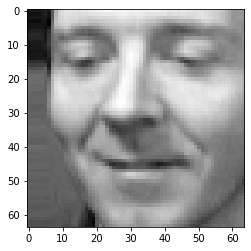

In [65]:
import matplotlib.pyplot as plt

image_shape = (64,64)
plt.imshow( faces[24].reshape(image_shape), cmap=plt.cm.gray )

Let's perform standardization on this image data using `StandardScaler`.

In [66]:
# TODO
scaler = preprocessing.StandardScaler()
faces_scaled = scaler.fit_transform(faces)

The transformation will also be visible when we display the resulting data using Matplotlib.

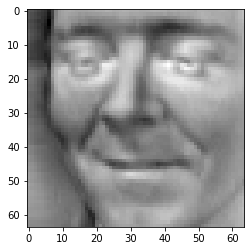

In [69]:
# TODO: Display the scaled 25th sample
image_shape = (64,64)
plt.imshow( faces_scaled[24].reshape(image_shape), cmap=plt.cm.gray )

## Principal Component Analysis

Principal Component Analysis is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is a technique which essentially helps us to reduce the dimensionality of our dataset. 

The [`sklearn.decomposition`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) module provides the transformer [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). It learns `n_components` in its `fit` method, and can be used on new data to project it on these components. 

In [71]:
from sklearn.decomposition import PCA

# TODO: instantiate PCA and apply it to the standardized faces data
# pca = ?
pca = PCA()
pca.fit(faces_scaled)

PCA()

Let us find out how many components are sufficient to explain our faces dataset, by plotting the cumulative explained variance against the number of components.

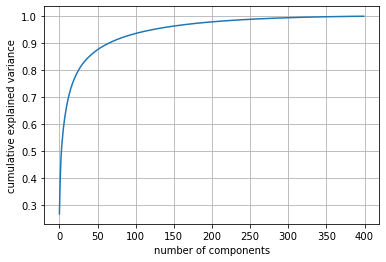

In [99]:
plt.plot( np.cumsum( pca.explained_variance_ratio_ ))
plt.xlabel( 'number of components' )
plt.ylabel( 'cumulative explained variance' )
plt.grid()

We see that 100 components explain about 90% of the variance in the dataset. Thus, those 100 components might be sufficient for our downstream tasks like prediction. 

As we have image data however, we can actually view these orthogonal components that PCA has learnt. These are called _Eigenfaces_. A combination of these eigenfaces is usually sufficient to recreate the original sample. 

In [100]:
n_components=100
h = w = 64

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, faces_scaled.shape[0]) )
pca = PCA( n_components=n_components, svd_solver='randomized', whiten=True ).fit( faces_scaled )

eigenfaces = pca.components_.reshape(( n_components, h, w ))

Extracting the top 100 eigenfaces from 400 faces


In [101]:
pca.components_.shape

(100, 4096)

In [102]:
eigenfaces.shape

(100, 64, 64)

Let's see how these Eigenfaces look like. The below code plots a gallery of portraits, with preset numbers of rows and columns.

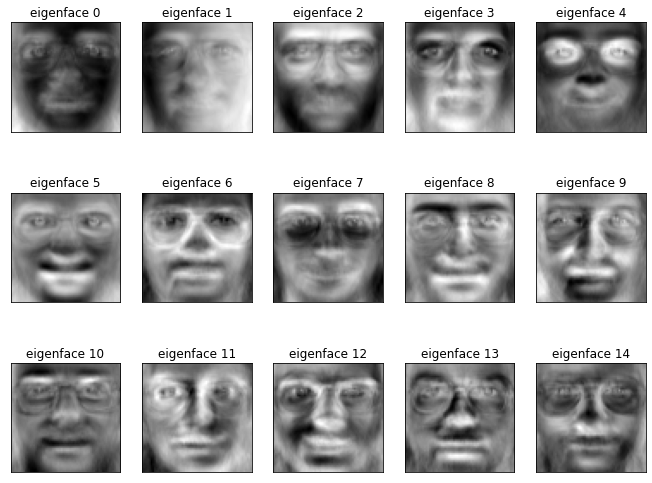

In [108]:
def plot_gallery( images, titles, h, w, n_row=3, n_col=5 ):
    "Helper function to plot a gallery of portraits"
    plt.figure( figsize=(1.8 * n_col, 2.4 * n_row) )
    plt.subplots_adjust( bottom=0, left=.01, right=.99, top=.90, hspace=.35 )
    for i in range( n_row * n_col ):
        plt.subplot( n_row, n_col,i+1)
        plt.imshow( images[i].reshape((h, w)), cmap=plt.cm.gray )
        plt.title( titles[i], size=12 )
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery( eigenfaces, eigenface_titles, h, w )

plt.show()

Eigenfaces are eigenvectors used in the computer vision problem of human face recognition. They are the principal components of a distribution of faces. They determine the variance in faces in a dataset, and the variances can be used to encode and decode a face in machine learning. 